In [1]:
import cu_rsc as cr
cr.setup_tables()
import RSC_sim
import numpy as np
import cupy as cp
import cupyx
import matplotlib.pyplot as plt
from tqdm import tqdm
M_dev = cr.load_m_table_device()        # upload to GPU
res   = cr.resources_from_config(M_dev)

### Check results optimized for nz=0, 1 number

In [3]:
seq_op = np.load("../op_amp_time/omega_time_ga_runs/OmegaTimeGA_20260210_141340/final_top5/top1_sequence.npy")

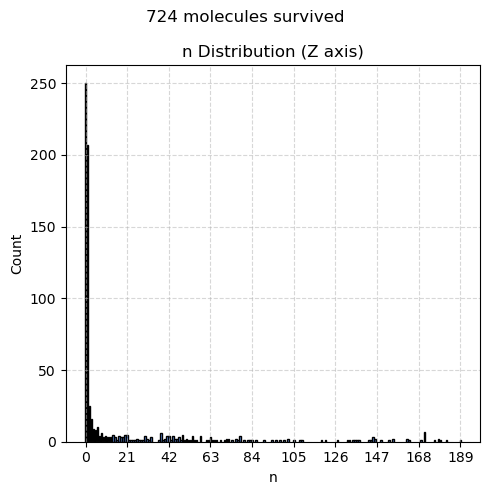

{'survival_rate_mean': array(0.724),
 'survival_rate_sem': array(0.00044982),
 'mot_mean': array([ 1.52486188,  2.8660221 , 17.70856354]),
 'mot_sem': array([0.00576312, 0.00946748, 0.04368718]),
 'ground_state_rate_mean': array(0.22649141),
 'ground_state_rate_sem': array(0.00042043),
 'N': array(1000, dtype=int32),
 'Ns_surv': array(724, dtype=int32),
 'B': array(1000, dtype=int32)}

In [4]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(
    mol_0,
    seq_op,
    res
)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

In [5]:
print("survival rate: ", np.round(result["survival_rate_mean"], 3))
print("N_z bar: ", np.round(result["mot_mean"][2], 3))
print("Ground state rate: ", np.round(result["ground_state_rate_mean"],3))

survival rate:  0.724
N_z bar:  17.709
Ground state rate:  0.226


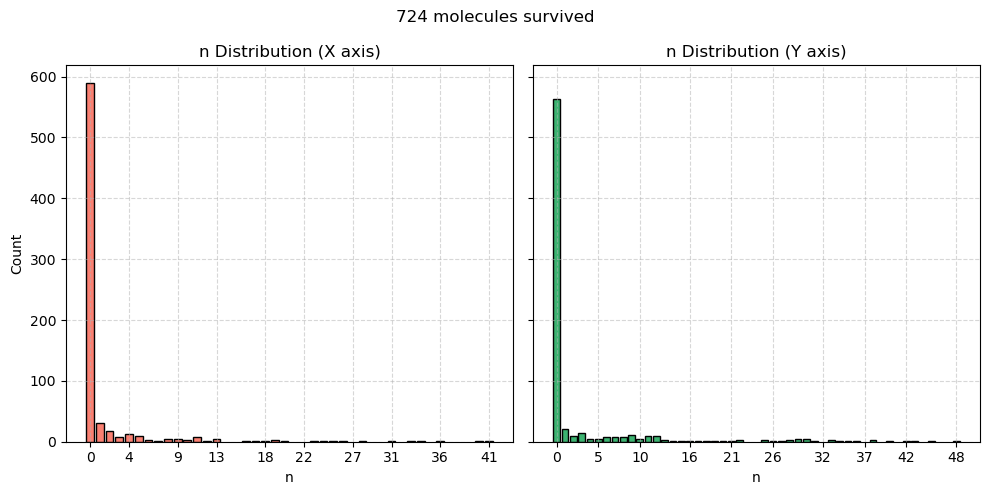

In [6]:
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(True, True, False))

In [7]:
zt_freqs = cp.linspace(-60e3, 60e3, 1000)
zt_rabi = 1.01e3
zt_pulse = 500e-6


frequencys, polarizations_opt = cr.raman_sideband_thermometry(
    molecules_dev=mol_0,
    axis=2,
    frequencys=zt_freqs,
    rabi_freq=zt_rabi,
    pulse_time=zt_pulse,
    res=res,
    k_max=2
)

Raman thermometry: 100%|██████████| 1000/1000 [00:07<00:00, 131.73it/s]


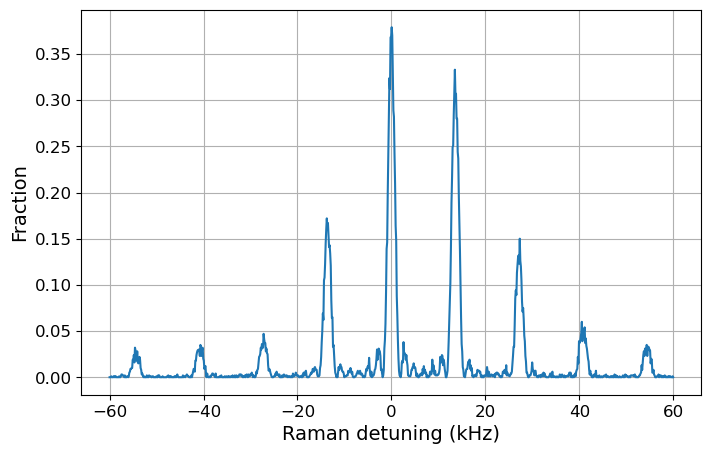

In [8]:
plt.figure(figsize=(8,5))
plt.plot(cp.asnumpy(frequencys*1e-3), cp.asnumpy(polarizations_opt)/1000)
plt.xlabel("Raman detuning (kHz)", fontsize=14)
plt.ylabel("Fraction", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()

### LZ sweep

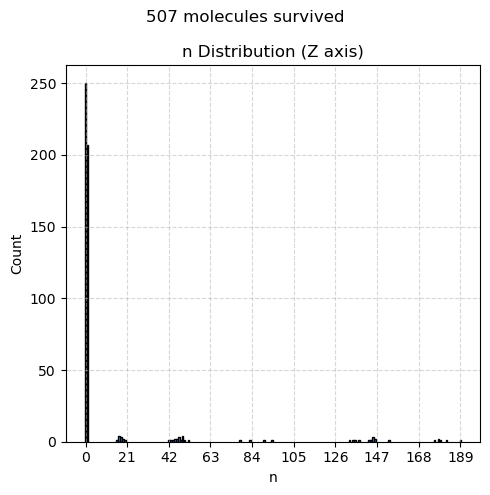

survival rate:  0.507
N_z bar:  8.554
Ground state rate:  0.435


In [9]:
mol = mol_0.copy()
cr.apply_lz_sweep(mol, axis=2, d_n=-2, Omega_lin=3.3e3, Delta_sweep=5e3, t_sec=10e-3, res=res)
cr.blow_pulse(mol)
dist = cr.get_n_distribution_gpu(mol, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol)
print("survival rate: ", np.round(result["survival_rate_mean"], 3))
print("N_z bar: ", np.round(result["mot_mean"][2], 3))
print("Ground state rate: ", np.round(result["ground_state_rate_mean"],3))

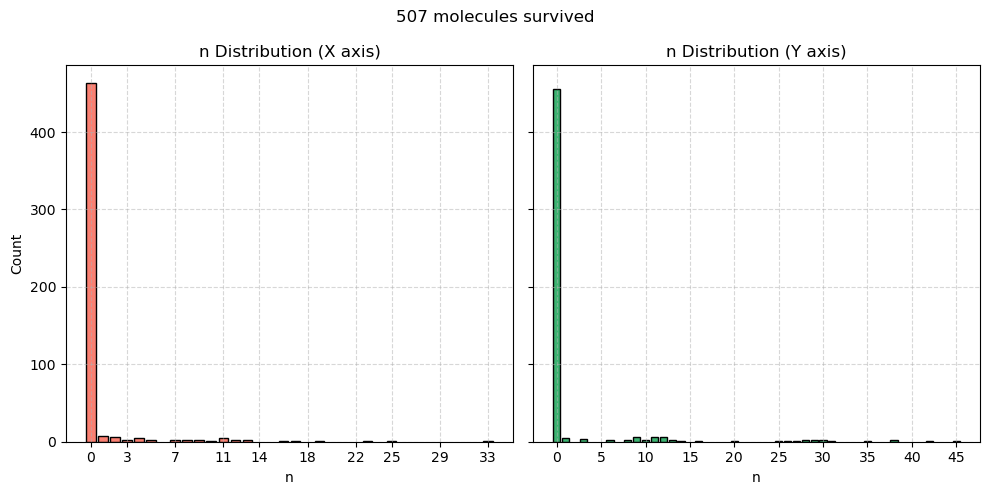

In [10]:
dist = cr.get_n_distribution_gpu(mol, max_bins=10, plot=(True, True, False))

In [11]:
zt_freqs = cp.linspace(-60e3, 60e3, 1000)
zt_rabi = 1.01e3
zt_pulse = 500e-6


frequencys, polarizations_opt = cr.raman_sideband_thermometry(
    molecules_dev=mol,
    axis=2,
    frequencys=zt_freqs,
    rabi_freq=zt_rabi,
    pulse_time=zt_pulse,
    res=res,
    k_max=2
)

Raman thermometry: 100%|██████████| 1000/1000 [00:06<00:00, 155.61it/s]


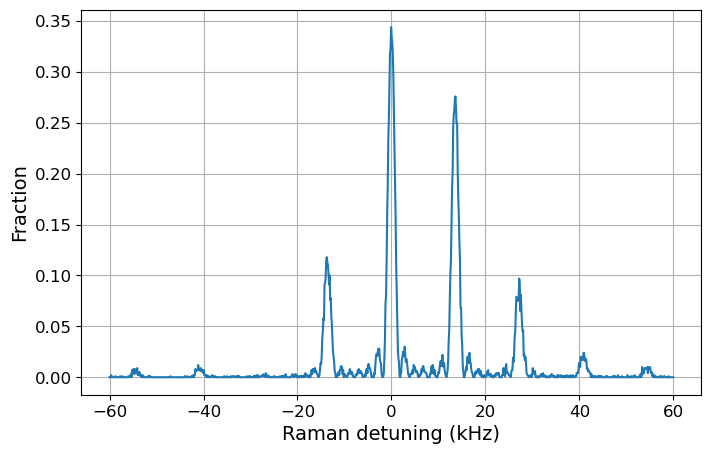

In [12]:
plt.figure(figsize=(8,5))
plt.plot(cp.asnumpy(frequencys*1e-3), cp.asnumpy(polarizations_opt)/1000)
plt.xlabel("Raman detuning (kHz)", fontsize=14)
plt.ylabel("Fraction", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()

In [15]:
seq_op[40:120]

array([[ 2.00000000e+00, -1.00000000e+01,  1.40685998e+04,
         2.66231928e-05],
       [ 2.00000000e+00, -9.00000000e+00,  1.86541078e+04,
         4.27740350e-05],
       [ 2.00000000e+00, -8.00000000e+00,  2.03898282e+04,
         4.10213287e-05],
       [ 2.00000000e+00, -7.00000000e+00,  1.16945943e+04,
         2.18312536e-05],
       [ 0.00000000e+00, -3.00000000e+00,  1.84187616e+04,
         7.63928164e-05],
       [ 2.00000000e+00, -1.00000000e+01,  1.40685998e+04,
         2.66231928e-05],
       [ 2.00000000e+00, -9.00000000e+00,  1.86541078e+04,
         4.27740350e-05],
       [ 2.00000000e+00, -8.00000000e+00,  2.03898282e+04,
         4.10213287e-05],
       [ 2.00000000e+00, -7.00000000e+00,  1.16945943e+04,
         2.18312536e-05],
       [ 1.00000000e+00, -3.00000000e+00,  1.85722610e+04,
         7.00206985e-05],
       [ 2.00000000e+00, -1.00000000e+01,  1.40685998e+04,
         2.66231928e-05],
       [ 2.00000000e+00, -9.00000000e+00,  1.86541078e+04,
      